#**1. Business Understanding**

**TITANIC SURVIVAL PREDICTION**

Using the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is
a classic beginner project with readily available data.
The dataset typically used for this project contains information about individual passengers, such as their age,
gender, ticket class, fare, cabin, and whether or not they survived.

#**2. Data Collection & Understanding**

**Referrence :-** [Click here](https://www.kaggle.com/datasets/ashishkumarjayswal/titanic-datasets)

#**3. Data Preparation / Processing**

In [58]:
# including all the dependencies

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
# loading dataset

titan_data = pd.read_csv('/content/titanic.csv')

titan_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
# exploring some general details

print("\nDataset dimension (row, col) = ", titan_data.shape)

# to check whether data types

print("\nDataset info = \n")
print(titan_data.info())

# to check missing values for every column

print("\nTotal missing values as per columns = \n")
print(titan_data.isnull().sum())


Dataset dimension (row, col) =  (418, 12)

Dataset info = 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

Total missing values as per columns = 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parc

In [61]:
# Since maximum values of 'Cabin' are missing, we need to drop this

titan_data = titan_data.drop(columns = 'Cabin', axis = 1)

# Since minimum values of 'Age' are missing, we will fill the missing values with Average(Age)

titan_data['Age'].fillna( titan_data['Age'].mean(), inplace = True )

# Since only single 'Fare' is missing, we will fill it with Mode(Fare)
# But at first, checking the index of most frequent value

print(titan_data['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [62]:
# Replacing the single missing value of 'Fare'

titan_data['Fare'].fillna( titan_data['Fare'].mode()[0], inplace = True )

# Rechecking whether any missing values left or not

print("\nTotal missing values as per column = \n")
titan_data.isnull().sum()


Total missing values as per column = 



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [63]:
# Statistical exploration of dataset

titan_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200



Total count of people survived or not = 

Survived
0    266
1    152
Name: count, dtype: int64

In graphical way = 



<Axes: xlabel='Sex', ylabel='count'>

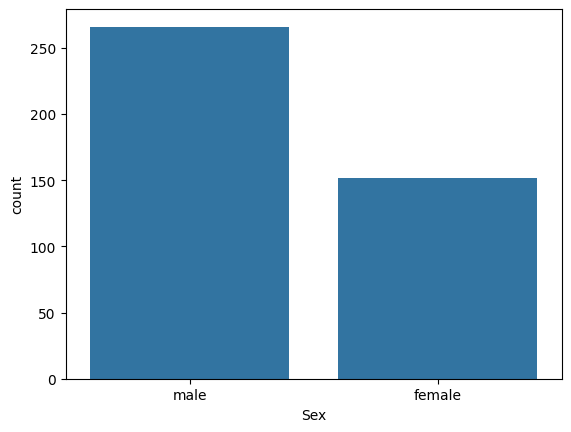

In [64]:
# Count of people survived or not

print("\nTotal count of people survived or not = \n")
print(titan_data['Survived'].value_counts())

# Count Plot to display

print("\nIn graphical way = \n")
sns.countplot(x='Sex', data=titan_data)

<Axes: xlabel='Sex', ylabel='count'>

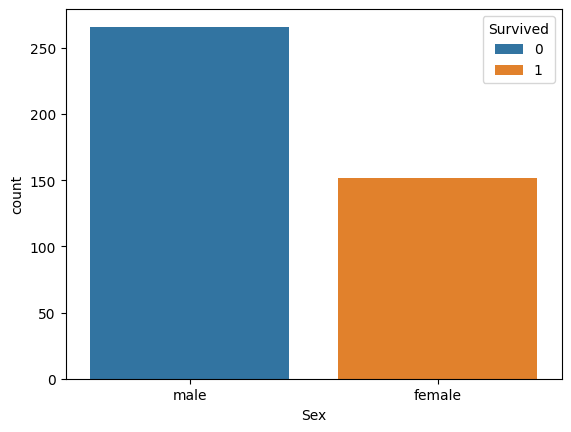

In [65]:
# count plot to display count of 'Survived' as per 'Sex'

sns.countplot(x='Sex', hue='Survived', data=titan_data)

<Axes: xlabel='Pclass', ylabel='count'>

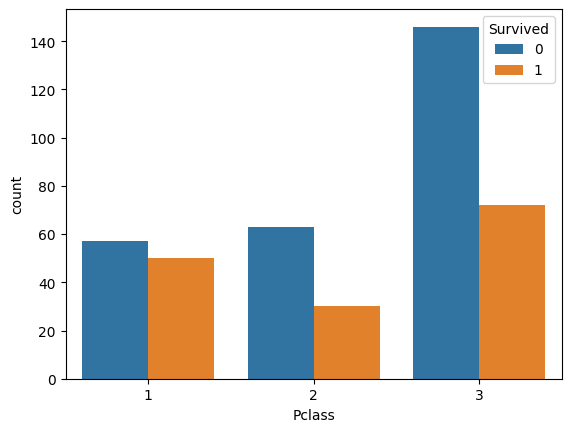

In [66]:
# count plot to display count of 'Survived' as per 'Pclass'

sns.countplot(x='Pclass', hue='Survived', data=titan_data)

In [67]:
# Converting the categorical column

# checking unique counts of data in object type columns

print("\n'Sex' unique value counts = \n")
print(titan_data['Sex'].value_counts())

print("\n'Embarked' unique value counts = \n")
print(titan_data['Embarked'].value_counts())


'Sex' unique value counts = 

Sex
male      266
female    152
Name: count, dtype: int64

'Embarked' unique value counts = 

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


In [68]:
# converting the categorical column

titan_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

titan_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


#**4. Modelling**

In [69]:
# Since scatterplot shows no relation
# Separating target & other useless columns

X = titan_data.drop(columns = ['Survived', 'PassengerId', 'Name', 'Ticket'], axis = 1)
Y = titan_data['Survived']

In [70]:
# splitting dataset into training and testing data
# Test dataset size = 20%, Random shuffling = 5 times

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [71]:
# Model

model = LogisticRegression()

# Training the model with training datasets

model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#**5. Evaluation**

In [72]:
# on Training data

X_train_prediction = model.predict(X_train)

print(X_train_prediction)

[0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1
 0]


In [73]:
# ACCURACY score on Training dataset

Training_accuracy = accuracy_score(Y_train, X_train_prediction)

print(f'Accuracy score on training dataset = {Training_accuracy}')

Accuracy score on training dataset = 1.0


In [74]:
# on Testing data

X_test_prediction = model.predict(X_test)

print(X_test_prediction)

[0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0
 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0]


In [75]:
# ACCURACY score on Testing dataset

Testing_accuracy = accuracy_score(Y_test, X_test_prediction)

print(f"Accuracy score on testing dataset = {Testing_accuracy}")

Accuracy score on testing dataset = 1.0


#**6. Deployment**